<center><h1 class="list-group-item list-group-item-success">INTERACTIVE  PLOTS  WITH  PLOTLY</center>

In [1]:
import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly import tools,subplots
import os

In [2]:
timesData = pd.read_csv("Data/timesData.csv")

In [3]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [4]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


# Line Charts

In [5]:
df = timesData.iloc[:100,:]
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

From this Visualization we can Infer that as <font color = "red" size = 4> World Rank is directly proprtional to university score for teaching</font>

# Scatter Plot

In [6]:
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

   <li><font color = "red" size = 4>Number of citation doesn't depend on world rank
  <li><font color = "red" size = 4>As Time goes higher Citations increases. It Shows the developement in 3 years</font>

# Bar Charts

In [7]:
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


<font color = "red" size = 4><center>Citations Vs Teaching for top 3 universities</font>

In [8]:
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [9]:
# prepare data frames
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)
layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0.8,0]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
for ydn, yd, xd in zip(y_nw, y_s, x_saving):

    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))

    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

fig = subplots.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

<font color = "red" size = 4>Here as Reasearch score increases income of the university also increases!!


# Pie Charts

In [10]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<font color = "red" size = 4>Harvard  University  has  higher  student  base  than  any  other universities !!



# Bubble Charts


In [11]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              7 non-null      object 
 1   university_name         7 non-null      object 
 2   country                 7 non-null      object 
 3   teaching                7 non-null      float64
 4   international           7 non-null      object 
 5   research                7 non-null      float64
 6   citations               7 non-null      float64
 7   income                  7 non-null      object 
 8   total_score             7 non-null      object 
 9   num_students            7 non-null      object 
 10  student_staff_ratio     7 non-null      float64
 11  international_students  7 non-null      object 
 12  female_male_ratio       6 non-null      object 
 13  year                    7 non-null      int64  
dtypes: float64(4), int64(1), object(9)
memor

<font color = "red" size = 4><center>Teaching Vs World Rank

In [12]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name    
    }
]
iplot(data)

####  <font size = 4 color = "red"> Bubble size denotes the capacity of student base in the university


# Histogram

In [13]:
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


# Word Cloud

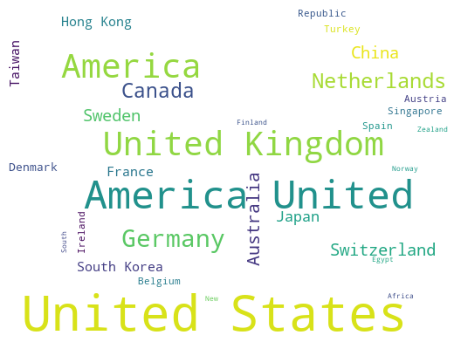

In [14]:

x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

# Box Plots

In [15]:

x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

# Scatter Matrix Plots

In [16]:
import plotly.figure_factory as ff
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

### <font  color = "green">Inferences
<ol>
    <li>Research directly proportional to total_score</li>
    <li>International Outlook directly proportionate to Research</li>
    <li>International Outlook doesnt have much correlation with total score</li>


# Inset Plots


In [17]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


# 3D Scatter Plot with Colorscaling

In [18]:
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


# Multiple Subplots


In [19]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<center><h1 class="list-group-item list-group-item-success">THANK YOU 😀</center>